In [1]:
import pandas as pd
excel_data = pd.read_csv("my_excel_data.csv")

In [2]:
excel_data.head()

,id,name,serving,calories,fat,protein,carb,fiber
0,1,Ground Beef,453.592,1137.0,90.0,76.0,0.0,0.0
1,2,OM Thick Cut,1.000,70.0,5.0,5.0,0.0,0.0
2,3,OM Bacon,2.000,90.0,8.0,6.0,0.0,0.0
3,4,OM Center Cut,2.000,60.0,4.5,5.0,0.0,0.0
4,5,Chicken,71.000,90.0,2.0,16.0,0.0,0.0


In [3]:
excel_data['name'].head()

0      Ground Beef
1     OM Thick Cut
2         OM Bacon
3    OM Center Cut
4          Chicken
Name: name, dtype: object

#### Grab a Specific Cell of the data frame

In [4]:
list(excel_data[excel_data.name == 'Ground Beef'].fiber)

[0.0]

#### Look up a food and return it's macro list

In [5]:
def get_macros(food):
    
    macros = []
    macros.extend(excel_data[excel_data.name == food].serving)
    macros.extend(excel_data[excel_data.name == food].calories)
    macros.extend(excel_data[excel_data.name == food].fat)
    macros.extend(excel_data[excel_data.name == food].protein)
    macros.extend(excel_data[excel_data.name == food].carb)
    macros.extend(excel_data[excel_data.name == food].fiber)
    macros.extend(round((excel_data[excel_data.name == food].carb) - (excel_data[excel_data.name == food].fiber),2))
    
    return macros

In [6]:
get_macros('Avocado')

[100.0, 167.0, 15.41, 1.96, 8.64, 6.8, 1.84]

# Set up Data Frame to Store Inputs

In [121]:
columns = ['Food', 'Serving', 'Calories', 'Fat', 'Protein', 'Carbs', 'Fiber', 'Net Carbs']
tracker_table = pd.DataFrame(columns=columns)
tracker_table = tracker_table.set_index('Food')

In [122]:
tracker_table

,Serving,Calories,Fat,Protein,Carbs,Fiber,Net Carbs
Food,,,,,,,


# Create a list of values to add to the Tracker Table

In [123]:
def num_of_servings(food, grams):
    return round((float(grams)/float(get_macros(food)[0])), 2)

In [124]:
# def add_to_table(food, grams):
#     new_table = tracker_table
#     to_add = [food]
#     servings = num_of_servings(food, grams)
#     base_macros = get_macros(food)
#     numbers_to_add = [i * servings for i in base_macros] 
#     to_add.extend(numbers_to_add)
#     new_table.loc[len(new_table)] = to_add
#     return new_table
    

In [131]:
def add_to_table(food, grams):
    new_table = pd.DataFrame(columns=columns)
    to_add = [food]
    servings = num_of_servings(food, grams)
    base_macros = get_macros(food)
    numbers_to_add = [i * servings for i in base_macros] 
    to_add.extend(numbers_to_add)
    new_table.loc[len(new_table)] = to_add
    new_table = new_table.set_index('Food')
    return new_table

In [134]:
def add_to_tracker_table(food, grams):
    line = add_to_table(food, grams)
    
    table = tracker_table.append(line)
    
    return tracker_table


In [137]:
g = add_to_table('Ground Beef', 45)

In [125]:
def get_totals():
    
    totals = list(tracker_table.sum())
    col = ['Calories', 'Fat', 'Protein', 'Carbs', 'Fiber', 'Net Carbs']
    totals_table = pd.DataFrame(columns=col)
    totals_table.loc[len(totals_table)] = totals[2:]
    return totals_table

In [130]:
add_to_table('Ground Beef', 45)

,Serving,Calories,Fat,Protein,Carbs,Fiber,Net Carbs
Food,,,,,,,
Ground Beef,45.3592,113.7,9.0,7.6,0.0,0.0,0.0


In [119]:
def remove_from_table(food):
#     count = 1
#     for i in list(tracker_table['Food']):
#         if i == food:
    tracker_table.drop(tracker_table[tracker_table.Food == food].index)
#             count += 1
    return tracker_table

In [120]:
remove_from_table('Mayo')

,Food,Serving,Calories,Fat,Protein,Carbs,Fiber,Net Carbs
0,Ground Beef,335.65808,841.38,66.6,56.24,0.0,0.0,0.0
1,Mayo,45.00000,300.00,36.0,0.00,0.0,0.0,0.0


In [104]:
list(tracker_table.sum())

['Ground BeefOM Thick CutTomatoPepper JackAvocadoMayo',
 656.64808,
 1509.06,
 134.0503,
 66.4066,
 16.419800000000002,
 10.965,
 5.4548]

In [107]:
get_totals()

,Calories,Fat,Protein,Carbs,Fiber,Net Carbs
0,1509.06,134.0503,66.4066,16.4198,10.965,5.4548


In [73]:
remove_from_table('Pecan')

KeyError: "['Pecan'] not found in axis"

In [74]:
tracker_table

,Food,Serving,Calories,Fat,Protein,Carbs,Fiber,Net Carbs
0,Pecan,99.90000,732.60,69.9300,9.9900,13.3200,6.660,6.6600
1,Ground Beef,335.65808,841.38,66.6000,56.2400,0.0000,0.000,0.0000
2,OM Thick Cut,1.00000,70.00,5.0000,5.0000,0.0000,0.000,0.0000
3,Tomato,119.00000,17.85,0.3094,1.1662,3.5462,0.833,2.7132
4,Pepper Jack,5.04000,18.00,1.6200,1.0800,0.0000,0.000,0.0000
5,Avocado,149.00000,248.83,22.9609,2.9204,12.8736,10.132,2.7416
6,Mayo,46.95000,313.00,37.5600,0.0000,0.0000,0.000,0.0000


In [42]:
tracker_table

,Food,Serving,Calories,Fat,Protein,Carbs,Fiber,Net Carbs


In [31]:
totals = {'calories': 0, 'protein': 0, 'fat': 0, 'carbs': 0, 'fiber': 0, 'net_carbs': 0}

In [29]:
def add_food(food, grams):
    totals['calories'] += (float(get_macros(food)[0]) * (float(grams)/float(get_macros(food)[5])))
    totals['fat'] += (float(get_macros(food)[1]) * (float(grams)/float(get_macros(food)[5])))
    totals['protein'] += (float(get_macros(food)[2]) * (float(grams)/float(get_macros(food)[5])))
    totals['carbs'] += (float(get_macros(food)[3]) * (float(grams)/float(get_macros(food)[5])))
    totals['fiber'] += (float(get_macros(food)[4]) * (float(grams)/float(get_macros(food)[5])))
    totals['net_carbs'] += ((float(get_macros(food)[3]) * (float(grams)/float(get_macros(food)[5]))) - (float(get_macros(food)[4]) * (float(grams)/float(get_macros(food)[5]))))       
    if totals['net_carbs'] >= 20.0:
        print ("You're over your carb limit!!!")
    else:
        print ('You have {} net carbs left!'.format(20 - totals['net_carbs']))
    return totals

In [32]:
add_food('OM Thick Cut', 1)

ZeroDivisionError: float division by zero

In [11]:
add_food("Pecan", 500)

You're over your carb limit!!!


{'calories': 4400.0,
 'protein': 60.0,
 'fat': 420.0,
 'carbs': 80.0,
 'fiber': 40.0,
 'net_carbs': 40.0}

In [12]:
add_food("Cucumber", 100)

You're over your carb limit!!!


{'calories': 4410.0,
 'protein': 60.59,
 'fat': 420.16,
 'carbs': 82.16,
 'fiber': 40.7,
 'net_carbs': 41.46}

In [13]:
add_food("OM Thick Cut", 3)

You're over your carb limit!!!


{'calories': 4620.0,
 'protein': 75.59,
 'fat': 435.16,
 'carbs': 82.16,
 'fiber': 40.7,
 'net_carbs': 41.46}

In [24]:
def clear_totals():
    for key in totals:
        totals[key] = 0
    return totals

In [25]:
totals

{'calories': 17000.0,
 'protein': 44.2,
 'fat': 2550.0,
 'carbs': 166.6,
 'fiber': 506.6,
 'net_carbs': -340.0}

In [26]:
clear_totals()

{'calories': 0, 'protein': 0, 'fat': 0, 'carbs': 0, 'fiber': 0, 'net_carbs': 0}

In [17]:
add_food('Mixed Greens', 150)

You have 15.3125 net carbs left!


{'calories': 42.65625,
 'protein': 3.28125,
 'fat': 0.46875,
 'carbs': 7.96875,
 'fiber': 3.28125,
 'net_carbs': 4.6875}

In [18]:
add_food('Chicken', 350)

You have 15.3125 net carbs left!


{'calories': 486.31822183098586,
 'protein': 82.15448943661971,
 'fat': 10.327904929577464,
 'carbs': 7.96875,
 'fiber': 3.28125,
 'net_carbs': 4.6875}

In [19]:
add_food('OM Bacon', 3)

You have 15.3125 net carbs left!


{'calories': 621.3182218309859,
 'protein': 91.15448943661971,
 'fat': 22.327904929577464,
 'carbs': 7.96875,
 'fiber': 3.28125,
 'net_carbs': 4.6875}

In [20]:
add_food('Locatelli', 40)

You have 15.3125 net carbs left!


{'calories': 778.461078973843,
 'protein': 101.15448943661971,
 'fat': 33.756476358148895,
 'carbs': 7.96875,
 'fiber': 3.28125,
 'net_carbs': 4.6875}

In [21]:
add_food('Walnut', 45)

You have 12.1625 net carbs left!


{'calories': 1072.761078973843,
 'protein': 107.90448943661971,
 'fat': 63.006476358148895,
 'carbs': 14.26875,
 'fiber': 6.43125,
 'net_carbs': 7.8375}

In [22]:
add_food('Avocado', 180)

You have 8.850499999999998 net carbs left!


{'calories': 1373.3610789738432,
 'protein': 111.43248943661972,
 'fat': 90.74447635814889,
 'carbs': 29.820750000000004,
 'fiber': 18.67125,
 'net_carbs': 11.149500000000002}

In [23]:
add_food('Cucumber', 100)

You have 7.390499999999998 net carbs left!


{'calories': 1383.3610789738432,
 'protein': 112.02248943661972,
 'fat': 90.90447635814888,
 'carbs': 31.980750000000004,
 'fiber': 19.37125,
 'net_carbs': 12.609500000000002}

In [24]:
add_food('Tomato', 120)

You have 4.654499999999997 net carbs left!


{'calories': 1401.3610789738432,
 'protein': 113.19848943661972,
 'fat': 91.21647635814888,
 'carbs': 35.55675,
 'fiber': 20.21125,
 'net_carbs': 15.345500000000003}

In [25]:
add_food('Olive Oil', 75)

You have 4.654499999999997 net carbs left!


{'calories': 2097.7896504024147,
 'protein': 113.19848943661972,
 'fat': 166.2164763581489,
 'carbs': 35.55675,
 'fiber': 20.21125,
 'net_carbs': 15.345500000000003}

In [26]:
def calculate_macro_percentages():
    total_calories = totals['protein']*4 + totals['fat']*9 + totals['net_carbs']*4
    protein_percent = str((totals['protein'] * 4 / total_calories)*100) + '%'
    fat_percent = str((totals['fat'] * 9 / total_calories)*100) + '%'
    carb_percent = str((totals['net_carbs'] * 4 / total_calories)*100) + '%'
    percentages = {'Fat': fat_percent, 'Protein': protein_percent, 'Carb': carb_percent, 'Net_Carbs': totals['net_carbs']}
    return percentages

In [27]:
totals

{'calories': 2097.7896504024147,
 'protein': 113.19848943661972,
 'fat': 166.2164763581489,
 'carbs': 35.55675,
 'fiber': 20.21125,
 'net_carbs': 15.345500000000003}

In [28]:
calculate_macro_percentages()

{'Fat': '74.42068772449441%',
 'Protein': '22.525670185788808%',
 'Carb': '3.0536420897167798%',
 'Net_Carbs': 15.345500000000003}

In [29]:
def pie_chart_data():
    total_calories = totals['protein']*4 + totals['fat']*9 + totals['net_carbs']*4
    protein_percent = totals['protein'] * 4 / total_calories
    fat_percent = totals['fat'] * 9 / total_calories
    carb_percent = totals['net_carbs'] * 4 / total_calories
    percentages = {'Fat': fat_percent, 'Protein': protein_percent, 'Carb': carb_percent}
    return percentages

In [30]:
import matplotlib.pyplot as plt
from collections import Counter


# Data to plot
labels = list(Counter(pie_chart_data()))
sizes = list(Counter(pie_chart_data()).values())
colors = ['lightblue', 'lightcoral', 'yellowgreen']
explode = (0, 0, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

<Figure size 640x480 with 1 Axes>

In [31]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
# values = [4500,2500,1053,500]

# trace = go.Pie(labels=labels, values=values)

# py.iplot([trace], filename='basic_pie_chart')

In [32]:
# class Food:
#     def __init__(self, name, calories, protein, fat, carb, fiber, serving):
#         self.name = name
#         self.calories = calories
#         self.protein = protein
#         self.fat = fat
#         self.fiber = fiber
#         self.serving = serving

In [33]:
totals = {'calories': 0, 'protein': 0, 'fat': 0, 'carbs': 0, 'fiber': 0, 'net_carbs': 0}

In [34]:
def add_foods(food, grams):
    totals['calories'] += get_macros(food)[0] * grams / get_macros(food)[5]
    totals['fat'] += get_macros(food)[1] * grams / get_macros(food)[5]
    totals['protein'] += get_macros(food)[2] * grams / get_macros(food)[5]
    totals['carbs'] += get_macros(food)[3] * grams / get_macros(food)[5]
    totals['fiber'] += get_macros(food)[4] * grams / get_macros(food)[5]
    totals['net_carbs'] += (get_macros(food)[3] * grams / get_macros(food)[5])
    - (get_macros(food)[4] * grams / get_macros(food)[5])
    if totals['net_carbs'] >= 20.0:
        print ("You're over your carb limit!!!")
    else:
        print ('You have {} net carbs left!'.format(20 - totals['net_carbs']))
    return totals

In [35]:
add_foods('Ground Beef', 5000)

You have 20.0 net carbs left!


{'calories': 12533.289828744775,
 'protein': 837.7572796698355,
 'fat': 992.0809890827,
 'carbs': 0.0,
 'fiber': 0.0,
 'net_carbs': 0.0}

In [36]:
clear_totals()

{'calories': 0, 'protein': 0, 'fat': 0, 'carbs': 0, 'fiber': 0, 'net_carbs': 0}

In [37]:
add_food("Ground Beef", 302)

You have 20.0 net carbs left!


{'calories': 757.0107056561844,
 'protein': 50.600539692058064,
 'fat': 59.92169174059507,
 'carbs': 0.0,
 'fiber': 0.0,
 'net_carbs': 0.0}

In [38]:
add_food('OM Thick Cut', 2)

You have 20.0 net carbs left!


{'calories': 897.0107056561844,
 'protein': 60.600539692058064,
 'fat': 69.92169174059507,
 'carbs': 0.0,
 'fiber': 0.0,
 'net_carbs': 0.0}

In [39]:
add_food("Mayo", 45 )

You have 20.0 net carbs left!


{'calories': 1197.0107056561844,
 'protein': 60.600539692058064,
 'fat': 105.92169174059507,
 'carbs': 0.0,
 'fiber': 0.0,
 'net_carbs': 0.0}

In [40]:
add_food("Pepper Jack", 2)

You have 20.0 net carbs left!


{'calories': 1204.1535627990415,
 'protein': 61.029111120629494,
 'fat': 106.5645488834522,
 'carbs': 0.0,
 'fiber': 0.0,
 'net_carbs': 0.0}

In [43]:
add_food("Avocado", 100)

You have 18.16 net carbs left!


{'calories': 1371.1535627990415,
 'protein': 62.989111120629495,
 'fat': 121.9745488834522,
 'carbs': 8.64,
 'fiber': 6.8,
 'net_carbs': 1.8400000000000007}

In [44]:
add_food("Tomato", 100)

You have 15.879999999999999 net carbs left!


{'calories': 1386.1535627990415,
 'protein': 63.96911112062949,
 'fat': 122.2345488834522,
 'carbs': 11.620000000000001,
 'fiber': 7.5,
 'net_carbs': 4.120000000000001}

In [45]:
add_food("Heavy Cream", 60)

You have 15.879999999999999 net carbs left!


{'calories': 1593.9097954860222,
 'protein': 63.96911112062949,
 'fat': 147.16529680588988,
 'carbs': 11.620000000000001,
 'fiber': 7.5,
 'net_carbs': 4.120000000000001}

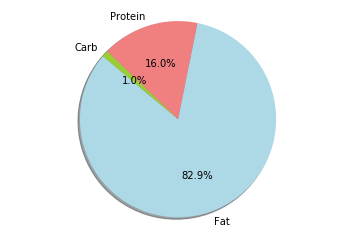

In [46]:
import matplotlib.pyplot as plt
from collections import Counter


# Data to plot
labels = list(Counter(pie_chart_data()))
sizes = list(Counter(pie_chart_data()).values())
colors = ['lightblue', 'lightcoral', 'yellowgreen']
explode = (0, 0, 0)
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [47]:
clear_totals()

{'calories': 0, 'protein': 0, 'fat': 0, 'carbs': 0, 'fiber': 0, 'net_carbs': 0}

In [49]:
add_food("MCT", 15)

You have 20.0 net carbs left!


{'calories': 138.29787234042553,
 'protein': 0.0,
 'fat': 14.893617021276595,
 'carbs': 0.0,
 'fiber': 0.0,
 'net_carbs': 0.0}

In [17]:
a = "Hey"
b = list(a)

In [18]:
b

['H', 'e', 'y']